In [19]:
df = pd.read_csv('Data_MASQLong.csv')

In [20]:
df

,ID,Age_T1,Gender,Edu_T1,MH_Diag_T1,MASQDG_mean_T1,MASQAN_mean_T1,MASQ_ANH_mean_T1,MASQDG_sum_T1,MASQAN_sum_T1,...,MASQAN_sum_T3,MASQ_ANH_sum_T3,Age_T4,MASQ_ANH_mean_T4,MASQDG_mean_T4,MASQAN_mean_T4,MASQDG_sum_T4,MASQAN_sum_T4,MASQ_ANH_sum_T4,Age_T1_group
0,1,19,2.0,1,2,1.125,2.0,2.375,9,20,...,11,18,19,2.500,1.500,1.2,12,12,20,17-20
1,2,20,1.0,1,2,2.750,1.6,3.750,22,16,...,19,22,20,4.000,2.125,1.2,17,12,32,17-20
2,5,23,1.0,1,1,1.500,1.1,2.000,12,11,...,12,19,24,3.125,1.875,1.7,15,17,25,>23
3,6,24,2.0,3,2,4.000,1.6,3.750,32,16,...,24,25,25,4.125,3.250,1.1,26,11,33,>23
4,7,19,1.0,1,2,1.500,1.0,2.500,12,10,...,10,26,20,4.000,2.875,1.0,23,10,32,17-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,503,18,1.0,1,2,2.125,1.5,2.500,17,15,...,10,26,18,2.750,1.875,1.2,15,12,22,17-20
227,504,18,1.0,1,2,2.500,1.2,3.750,20,12,...,18,18,18,2.750,2.500,1.3,20,13,22,17-20
228,510,33,1.0,3,2,5.000,3.5,3.625,40,35,...,15,31,33,4.250,3.500,2.7,28,27,34,>23
229,514,26,2.0,3,2,1.125,1.0,1.750,9,10,...,10,14,27,1.750,1.000,1.0,8,10,14,>23


Dataset Data_MASQLong.csv contains data regarding students’ mood and anxiety symptoms throughout an academic year (a total of 4 measurements were taken for each participant at T1, T2, T3, and T4), collected at the Northwest Mexico University as a preregistration study.
The Faceted Inventory of the Five-Factor Model (FI-FFM) was used to assess personality. It was designed to measure the facets of Big Five personality traits and consists of 207 items (Watson et al., 2017) with a 5-point Likert-type format ranging from strongly disagree to strongly agree.
The mini-MASQ (Casillas & Clark, 2000) is a 26-item instrument employing a five-point Likert-style scale. It includes abbreviated versions of three mini-MASQ scales: general distress, anhedonic depression, and anxious arousal.


Source: https://osf.io/yjter/


In [21]:
!pip install pingouin

In [22]:
import pingouin as pg
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import norm, pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

Analysis of Extra_T1:


,Extra_T1
count,231.000000
mean,3.240789
std,0.526470
min,1.513890
25%,2.949110
50%,3.236110
75%,3.612500
max,4.736110



Analysis of MASQAN_sum_T1:


,MASQAN_sum_T1
count,231.000000
mean,17.653680
std,8.215652
min,9.000000
25%,11.000000
50%,15.000000
75%,21.000000
max,47.000000


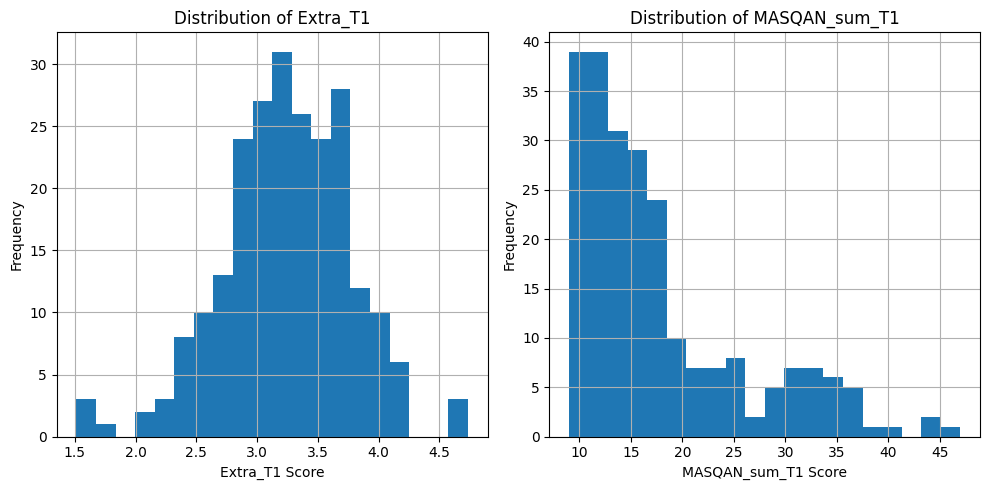

In [23]:
# Analyze Extra_T1
print("Analysis of Extra_T1:")
display(df['Extra_T1'].describe())

# Analyze MASQAN_sum_T1
print("\nAnalysis of MASQAN_sum_T1:")
display(df['MASQAN_sum_T1'].describe())



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Extra_T1'].hist(bins=20)
plt.title('Distribution of Extra_T1')
plt.xlabel('Extra_T1 Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['MASQAN_sum_T1'].hist(bins=20)
plt.title('Distribution of MASQAN_sum_T1')
plt.xlabel('MASQAN_sum_T1 Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 1. Normality tests

### Extra_T1

In [30]:
stat, p = stats.kstest(df["Extra_T1"], 'norm', args=(df["Extra_T1"].mean(), df["Extra_T1"].std()))
print(f" Result for Extra_T1: Statistic={stat:.4f}, p-value={p:.4f}")

 Result for Extra_T1: Statistic=0.0467, p-value=0.6781


/tmp/ipython-input-408202566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Extra_T1'].dropna(), fit=norm)


<Axes: xlabel='Extra_T1', ylabel='Density'>

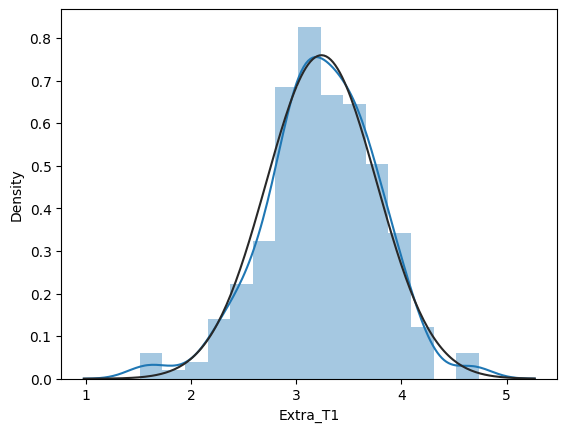

In [29]:
sns.distplot(df['Extra_T1'].dropna(), fit=norm)

### MASQAN_sum_T1

In [39]:
# @title
stat, p = stats.kstest(df["MASQAN_sum_T1"], 'norm', args=(df["MASQAN_sum_T1"].mean(), df["MASQAN_sum_T1"].std()))
print(f" Result for MASQAN_sum_T1: Statistic={stat:.4f}, p-value={p:.4f}")

 Result for MASQAN_sum_T1: Statistic=0.1854, p-value=0.0000


/tmp/ipython-input-2425022845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MASQ_ANH_sum_T1'].dropna(), fit=norm)


<Axes: xlabel='MASQ_ANH_sum_T1', ylabel='Density'>

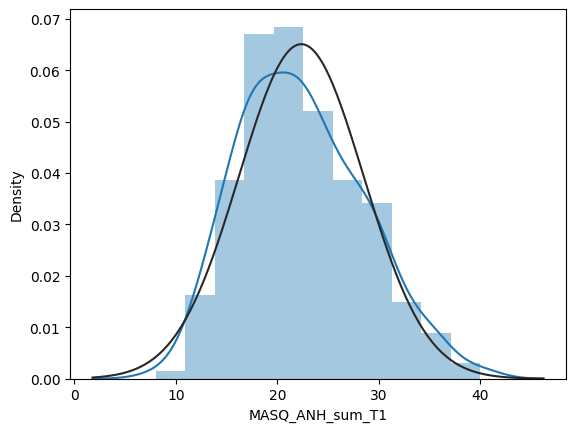

In [34]:
sns.distplot(df['MASQ_ANH_sum_T1'].dropna(), fit=norm)

### MASQ_ANH_sum_T1

In [ ]:
stat, p = stats.kstest(df["MASQ_ANH_sum_T1"], 'norm', args=(df["MASQ_ANH_sum_T1"].mean(), df["MASQ_ANH_sum_T1"].std()))
print(f" Result for MASQ_ANH_sum_T1: Statistic={stat:.4f}, p-value={p:.4f}")

In [ ]:
sns.distplot(df['MASQ_ANH_sum_T1'].dropna(), fit=norm)

### MASQ_ANH_sum_T4

In [ ]:
stat, p = stats.kstest(df["MASQ_ANH_sum_T4"], 'norm', args=(df["MASQ_ANH_sum_T4"].mean(), df["MASQ_ANH_sum_T4"].std()))
print(f" Result for MASQ_ANH_sum_T4: Statistic={stat:.4f}, p-value={p:.4f}")

In [ ]:
sns.distplot(df['MASQ_ANH_sum_T4'].dropna(), fit=norm)

### MASQDG_sum_T1

In [37]:
stat, p = stats.kstest(df["MASQDG_sum_T1"], 'norm', args=(df["MASQDG_sum_T1"].mean(), df["MASQDG_sum_T1"].std()))
print(f" Result for MASQDG_sum_T1: Statistic={stat:.4f}, p-value={p:.4f}")

 Result for MASQDG_sum_T1: Statistic=0.1561, p-value=0.0000


/tmp/ipython-input-2065624635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MASQDG_sum_T1'].dropna(), fit=norm)


<Axes: xlabel='MASQDG_sum_T1', ylabel='Density'>

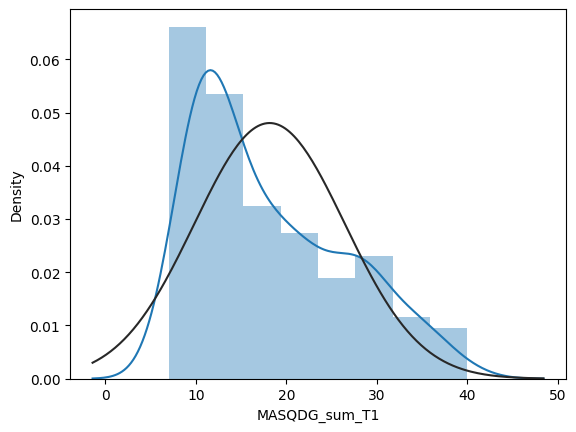

In [38]:
sns.distplot(df['MASQDG_sum_T1'].dropna(), fit=norm)

### MASQDG_sum_T4

In [35]:
stat, p = stats.kstest(df["MASQDG_sum_T4"], 'norm', args=(df["MASQDG_sum_T4"].mean(), df["MASQDG_sum_T4"].std()))
print(f" Result for MASQDG_sum_T4: Statistic={stat:.4f}, p-value={p:.4f}")

 Result for MASQDG_sum_T4: Statistic=0.1370, p-value=0.0003


/tmp/ipython-input-1901623371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MASQDG_sum_T4'].dropna(), fit=norm)


<Axes: xlabel='MASQDG_sum_T4', ylabel='Density'>

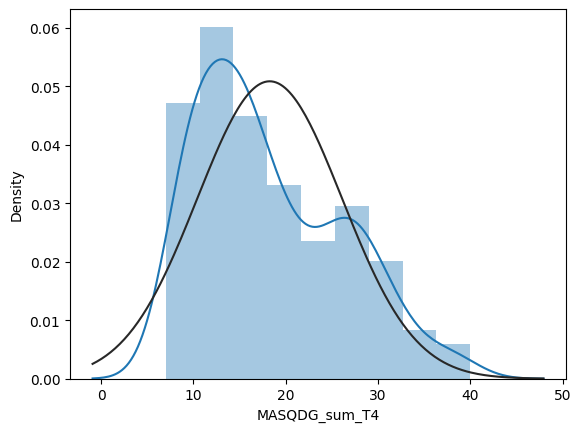

In [36]:
sns.distplot(df['MASQDG_sum_T4'].dropna(), fit=norm)

### Hypothesis :
1. Extra_T1 - normal (p-value=0.6623)

2. MASQAN_sum_T1 - not normal (p-value=0.0000)


3. MASQ_ANH_sum_T1 - normal (p-value=0.1066)

4. MASQ_ANH_sum_T4 - normal (p-value=0.2522)

5. MASQDG_sum_T1 - not normal (p-value=0.0000)

6. MASQDG_sum_T4 - not normal (p-value=0.0003)

## Number group
1. Age_T1_group - 3 groups

2. MH_Diag_T1 - 2 groups

3. Gender - 2 groups



## Group comparisons

### MH_Diag_T1

In [40]:
df.groupby('MH_Diag_T1')['MASQAN_sum_T1'].describe()

,count,mean,std,min,25%,50%,75%,max
MH_Diag_T1,,,,,,,,
1,52.0,22.538462,10.02636,10.0,14.0,19.0,31.0,47.0
2,179.0,16.234637,7.02969,9.0,11.0,14.0,18.0,44.0


In [41]:
group1 = df[df['MH_Diag_T1']==1]['MASQAN_sum_T1']
group2 = df[df['MH_Diag_T1']==2]['MASQAN_sum_T1']

In [43]:
stats.ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

TtestResult(statistic=np.float64(4.241084025270021), pvalue=np.float64(7.059280389086015e-05), df=np.float64(66.21898005549238))

H1: Variances of the Extra_T1 for people with and without mental health disorder diagnosis are different.

H0: Variances of the Extra_T1 for people with and without mental health disorder diagnosis are not different.

**Conclusion:** p-value < 0.05, H0 is rejected, H1 is not rejected => variances in two groups are different

-> t-test with Welch correction

In [42]:
stats.mannwhitneyu(group1.dropna(), group2.dropna())

MannwhitneyuResult(statistic=np.float64(6481.0), pvalue=np.float64(1.5492488404153658e-05))

MH_Diag_T1:

H1: Mean values of the Extra_T1 for people with and without mental health disorder diagnosis are different.

H0: Mean values of the Extra_T1 for people with and without mental health disorder diagnosis are not different.

**Conclusion:** p-value < 0.05, H1 is accepted

### Gender

In [ ]:
group1 = df[df['Gender']==1.0]['Extra_T1']
group2 = df[df['Gender']==2.0]['Extra_T1']

In [ ]:
stats.ttest_ind(group1.dropna(), group2.dropna())

H1: Variances of the Extra_T1 for people with and without mental health disorder diagnosis are different.

H0: Variances of the Extra_T1 for people with and without mental health disorder diagnosis are not different.

**Conclusion:** p-value > 0.05, H1 is rejected, H0 is not rejected => variances in two groups are not different


In [ ]:
stats.ttest_ind(group1.dropna(), group2.dropna())

H1: Mean values of the Extra_T1 for males and females are different.

H0: Mean values of the Extra_T1 for males and females are not different.

**Conclusion:** p-value > 0.05, H0 is accepted

### Age

In [ ]:
df.groupby('Age_T1_group')['Extra_T1'].describe()

In [ ]:
group1 = df[df['Age_T1_group']=='17-20']['Extra_T1']
group2 = df[df['Age_T1_group']=='21-22']['Extra_T1']
group3 = df[df['Age_T1_group']=='>23']['Extra_T1']

In [ ]:
stats.levene(group1.dropna(), group2.dropna(), group3.dropna())

different age

H1: Variances of the Extra_T1 for people of different age groups are different.

H0: Variances of the Extra_T1 for people of different age groups are not different.

**Conclusion:** p-value > 0.05, H1 is rejected

In [ ]:
stats.f_oneway(group1, group2, group3)

H1: the mean values of the Extra_T1 for people of different age groups are different

H0: the mean values of the Extra_T1 for people of different age groups are not different

**Conclusion:** p-value > 0.05, H0 is accepted

## Group comparisons for MASQAN_sum_T1

In [ ]:
df.groupby('MH_Diag_T1')['MASQAN_sum_T1'].describe()

In [ ]:
group1 = df[df['MH_Diag_T1']==1]['MASQAN_sum_T1']
group2 = df[df['MH_Diag_T1']==2]['MASQAN_sum_T1']

In [ ]:
stats.mannwhitneyu(group1.dropna(), group2.dropna())

MASQAN_sum_T1 - not normal > M-Whitney U test

H1: Values of the variable MASQAN_sum_T1 for people with and without mental health disorder diagnosis are different.

H0: Values of the variable MASQAN_sum_T1 for people with and without mental health disorder diagnosis are not different.

**Conclusion:** p-value < 0.05, H1 is accepted

### Gender

In [ ]:
df.groupby('Gender')['MASQAN_sum_T1'].describe()

In [ ]:
group1 = df[df['Gender']==1]['MASQAN_sum_T1']
group2 = df[df['Gender']==2]['MASQAN_sum_T1']

In [ ]:
stats.mannwhitneyu(group1.dropna(), group2.dropna())

H1: Values of the variable MASQAN_sum_T1 for males and females are different.

H0: Values of the variable MASQAN_sum_T1 for males and females are not different.

**Conclusion:** p-value > 0.05, H0 is accepted

### Age difference

In [ ]:
df.groupby('Age_T1_group')['MASQAN_sum_T1'].describe()

In [ ]:
group1 = df[df['Age_T1_group']=='17-20']['MASQAN_sum_T1']
group2 = df[df['Age_T1_group']=='21-22']['MASQAN_sum_T1']
group3 = df[df['Age_T1_group']=='>23']['MASQAN_sum_T1']

In [ ]:
stats.kruskal(group1, group2, group3)

H1: Variances of the MASQAN_sum_T1 for people of different age groups are different.

H0: Variances of the MASQAN_sum_T1 for people of different age groups are not different.

**Conclusion:** p-value > 0.05, H1 is rejected

## Compare the values of the MASQ_ANH_sum_* for time points T1 and T4

1. MASQ_ANH_sum_T1 - normal

2. MASQ_ANH_sum_T4 - normal

*  pair T-test

In [ ]:
df = df.dropna(subset=['MASQ_ANH_sum_T1'])
df = df.dropna(subset=['MASQ_ANH_sum_T4'])
stats.ttest_rel(df['MASQ_ANH_sum_T1'], df['MASQ_ANH_sum_T4'])

H1: Mean values of the MASQ_ANH_sum for T1 and T4 are different.

H0: Mean values of the MASQ_ANH_sum for T1 and T4 are not different.

Conclusion: p-value > 0.05, H1 is rejected

## Compare the values of the MASQDG_sum_* for time points T1 and T4

1. MASQDG_sum_T1 - not normal

2. MASQDG_sum_T4 - not normal

*  Wilcoxon signed-rank test

In [ ]:
df = df.dropna(subset=['MASQDG_sum_T1'])
df = df.dropna(subset=['MASQDG_sum_T4'])
stats.wilcoxon(df['MASQDG_sum_T1'], df['MASQDG_sum_T4'])